# Problem set 6: Solving the Solow model

[<img src="https://mybinder.org/badge_logo.svg">](https://mybinder.org/v2/gh/NumEconCopenhagen/exercises-2019/master?urlpath=lab/tree/PS6/problem_set_6.ipynb)

In [1]:
import numpy as np
from scipy import linalg
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt

# Tasks

## Solving matrix equations I

In [2]:
np.random.seed(1900)
n = 5
A = np.random.uniform(size=(n,n))
b = np.random.uniform(size=n)
c = np.random.uniform(size=n)
d = np.random.uniform(size=n)

**Question A:** Find the determinant of $[A \cdot A]^{-1}$

In [3]:

linalg.det(linalg.inv(A@A))

13132.548734461483

**Answer:**

In [4]:
X = linalg.det(linalg.inv(A@A))
print(X)

13132.548734461483


**Question B:** Solve the following equation systems directly using **scipy**.

$$
\begin{aligned}
Ax &= b \\
Ax &= c \\
Ax &= d 
\end{aligned}
$$

In [5]:
for matrix, name in zip([b,c,d],['b','c','d']):
    print(f'{name}:',linalg.solve(A,matrix))

b: [-15.33189031 -24.00998148  40.02675108  15.24193293   4.89008792]
c: [ -7.72469812 -11.6354722   20.86796131   7.93343031   1.55909328]
d: [-2.57374569 -4.00256301  7.93409587  2.56007481  1.25709881]


**Answer:**

In [6]:
xb = linalg.solve(A,b)
xc = linalg.solve(A,c)
xd = linalg.solve(A,d)
print('b:',xb)
print('c:',xc)
print('d:',xd)

b: [-15.33189031 -24.00998148  40.02675108  15.24193293   4.89008792]
c: [ -7.72469812 -11.6354722   20.86796131   7.93343031   1.55909328]
d: [-2.57374569 -4.00256301  7.93409587  2.56007481  1.25709881]


**Question C:** Solve the same equation systems as above using `linalg.lu_factor()` and `linalg.lu_solve()`. What is the benefit of this approach?

In [7]:
LU,piv = linalg.lu_factor(A) # only done once
xb = linalg.lu_solve((LU,piv),b) # much faster than regular solve
xc = linalg.lu_solve((LU,piv),c)
xd = linalg.lu_solve((LU,piv),d)
print('b:',xb)
print('c:',xc)
print('d:',xd)

b: [-15.33189031 -24.00998148  40.02675108  15.24193293   4.89008792]
c: [ -7.72469812 -11.6354722   20.86796131   7.93343031   1.55909328]
d: [-2.57374569 -4.00256301  7.93409587  2.56007481  1.25709881]


## Solving matrix equations II

In [8]:
F = np.array([[2.0, 1.0, -1.0], [-3.0, -1.0, 2], [-2.0, 1.0, 2.0]])
e = np.array([8.0, -11.0, -3.0])

**Question:** Use the function `gauss_jordan()` in the `numecon_linalg` module located in this folder to solve

$$
Fx = e
$$

In [9]:
import numecon_linalg

In [10]:
Y = np.column_stack((F,e))
numecon_linalg.gauss_jordan(Y)
Y[:,-1]

array([ 2.,  3., -1.])

**Answer:**

In [11]:
import numecon_linalg
Y = np.column_stack((F,e))
numecon_linalg.gauss_jordan(Y)
print('solution',Y[:,-1])
assert np.allclose(F@Y[:,-1],e)

solution [ 2.  3. -1.]


## Symbolic

In [12]:
sm.init_printing(use_unicode=True)

**Question A:** Find

$$
\lim_{x \rightarrow 0} \frac{\sin(x)}{x}
$$

and

$$
\frac{\partial\sin(2x)}{\partial x} 
$$

In [13]:
x = sm.symbols('x')
sm.limit((sm.sin(x)/x),x,0)

In [14]:
sm.diff(sm.sin(2*x),x)

**Answer:**

In [15]:
print('the limit is:')
x = sm.symbols('x')
sm.limit(sm.sin(x)/x,x,0)

the limit is:


In [16]:
print('the derivative is')
x = sm.symbols('x')
sm.diff(sm.sin(2*x),x)

the derivative is


**Question B:** Solve the equation

$$ 
\frac{\sin(x)}{x} = 0
$$

In [17]:
sm.solve(sm.sin(x)/x,x)[0]

**Answer:**

In [18]:
sm.solve(sm.sin(x)/x)

# Problem: Solve the Solow model

## Introduction

Consider the **standard Solow-model** where:

1. $K_t$ is capital
* $L_t$ is labor (growing with a constant rate of $n$)
* $A_t$ is technology (growing with a constant rate of $g$)
* $Y_t = F(K_t,A_tL_t)$ is GDP

**Saving** is a constant fraction of GDP

$$ 
S_t = sY_t,\,s\in(0,1)
$$

such that **capital accumulates** according to

$$
K_{t+1}=S_{t}+(1-\delta)K_{t}=sF(K_{t},A_{t}L_{t})+(1-\delta)K_{t}, \delta \in (0,1)
$$

The **production function** has **constant-return to scale** such that

$$
\frac{Y_{t}}{A_{t}L_{t}}=\frac{F(K_{t},A_{t}L_{t})}{A_{t}L_{t}}=F(\tilde{k}_{t},1)\equiv f(\tilde{k}_{t})
$$

where $\tilde{k}_t = \frac{K_t}{A_{t}L_{t}}$ is the technology adjusted capital-labor ratio.

The **transition equation** then becomes

$$
\tilde{k}_{t+1}= \frac{1}{(1+n)(1+g)}[sf(\tilde{k}_{t})+(1-\delta)\tilde{k}_{t}]
$$

If the **production function** is **Cobb-Douglas** then

$$
F(K_{t},A_{t}L_{t})=K_{t}^{\alpha}(A_{t}L_{t})^{1-\alpha}\Rightarrow f(\tilde{k}_{t})=\tilde{k}_{t}^{\alpha}
$$

If it is **CES** (with $\beta < 1, \beta \neq 0$) then

$$
F(K_{t},A_{t}L_{t})=(\alpha K_{t}^{\beta}+(1-\alpha)(A_{t}L_{t})^{\beta})^{\frac{1}{\beta}}\Rightarrow f(\tilde{k}_{t})=(\alpha\tilde{k}_{t}^{\beta}+(1-\alpha))^{\frac{1}{\beta}}
$$

## Steady state

Assume the production function is **Cobb-Douglas**.

**Question A:** Use **sympy** to find an analytical expression for the steady state, i.e. solve

$$
\tilde{k}^{\ast}= \frac{1}{(1+n)(1+g)}[sf(\tilde{k}^{\ast})+(1-\delta)\tilde{k}^{\ast}]
$$

In [19]:
k = sm.symbols('k')
alpha = sm.symbols('alpha')
delta = sm.symbols('delta')
s = sm.symbols('s')
g = sm.symbols('g')
n = sm.symbols('n')

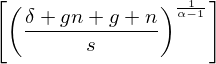

In [20]:
transition = sm.Eq(k,(s*k**alpha+(1-delta)*k)/((1+n)*(1+g)))
sm.solve(transition,k)

**Answer:**

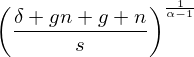

In [21]:
f = k**alpha
ss = sm.Eq(k,(s*f+(1-delta)*k)/((1+n)*(1+g)))
kss = sm.solve(ss,k)[0]
kss

**Question B:** Turn you solution into a Python function called as `ss_func(s,g,n,delta,alpha)`. 

In [22]:
ss_func = sm.lambdify((s,g,n,delta,alpha),sm.solve(transition,k)[0])
ss_func(0.2,0.02,0.01,0.1,1/3)

**Answer:**

In [23]:
ss_func = sm.lambdify((s,g,n,delta,alpha),kss)

In [24]:
ss_func(0.2,0.02,0.01,0.1,1/3)

**Question C**: Find the steady state numerically.

In [25]:
s = 0.2
g = 0.02
n = 0.01
alpha = 1/3
delta = 0.1

transitioneq = lambda k: (s*k**alpha+(1-delta)*k)/((1+n)*(1+g))

def ss_num(transitioneq,s,g,n,delta,alpha,guess=2,rtol=1.0000000000000001e-010,
           atol=1e-12,jump=1,max_iter=2000, beta= 0, printit=True):
    k1= transitioneq(guess)
    cond = np.isclose(k1,guess,rtol=rtol,atol=atol)
    i = 0
    while not cond:
        i+=1
        if i>max_iter:
            print('max iterations reached')
            break
            return None
        guess += jump*(k1-guess)
        k1= transitioneq(guess)
        cond = np.isclose(k1,guess,rtol=rtol,atol=atol)
    if printit:
        print(f'K_star is {guess:.20f}')
        print(f'Check:    {k1:.20f}')
    
    return guess

kstar = ss_num(transitioneq,s,g,n,delta,alpha)

K_star is 1.90383154138895749341
Check:    1.90383154120716469038


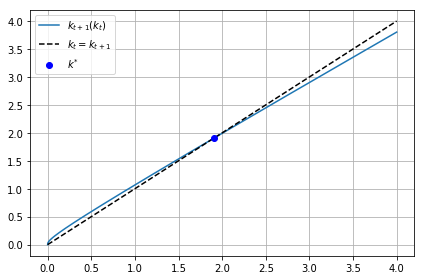

In [26]:
ks = np.linspace(0,4,10000)
ks1 = [transitioneq(k) for k in ks]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(ks,ks1,label='$k_{t+1}(k_{t})$')
ax.plot(ks,ks,ls='--',color='black',label='$k_{t}=k_{t+1}$')
ax.plot(kstar,transitioneq(kstar),ls='',marker='o',color='blue',label='$k^{*}$')


ax.grid(True)
plt.legend(loc="upper left")
fig.tight_layout()

**Answer:**

In [27]:
f = lambda k: k**alpha
obj_kss = lambda kss: kss - (s*f(kss) + (1-delta)*kss)/((1+g)*(1+n))
result = optimize.root_scalar(obj_kss,bracket=[0.1,100],method='brentq')

print('the steady state for k is',result.root)    

the steady state for k is 1.9038315392313185


**Question D:** Now assume the production function is CES. Find the steady state for $k$ for the various values of $\beta$ shown below.

$$
F(K_{t},A_{t}L_{t})=(\alpha K_{t}^{\beta}+(1-\alpha)(A_{t}L_{t})^{\beta})^{\frac{1}{\beta}}\Rightarrow f(\tilde{k}_{t})=(\alpha\tilde{k}_{t}^{\beta}+(1-\alpha))^{\frac{1}{\beta}}
$$

In [28]:
betas = [-0.5,-0.25,-0.1,-0.05,0.05,0.1,0.25,0.5]

f = lambda k: (alpha*k**beta+(1-alpha))**(1/beta)
trans_eq = lambda kss:(s*f(kss) + (1-delta)*kss)/((1+g)*(1+n))

for beta in betas:
    
    k_s = ss_num(trans_eq,s,g,n,delta,alpha, beta=beta, printit=False)

    print(f'When beta= {beta:5.2f} the steady state for k is {k_s:.15f}')  

When beta= -0.50 the steady state for k is 1.847129701923042
When beta= -0.25 the steady state for k is 1.873383264875734
When beta= -0.10 the steady state for k is 1.891085641935206
When beta= -0.05 the steady state for k is 1.897358104639712
When beta=  0.05 the steady state for k is 1.910515975173142
When beta=  0.10 the steady state for k is 1.917422135156361
When beta=  0.25 the steady state for k is 1.939590275709855
When beta=  0.50 the steady state for k is 1.982233502409577


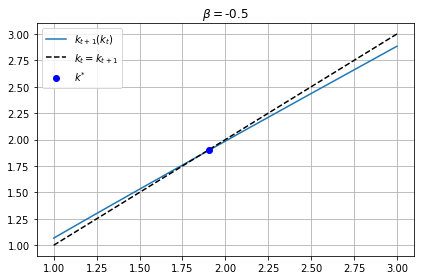

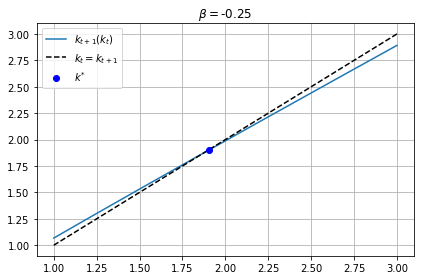

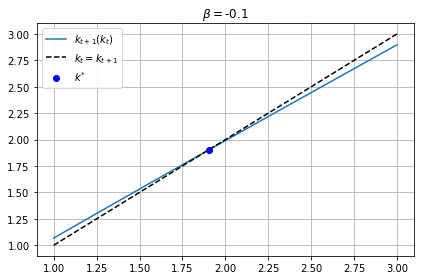

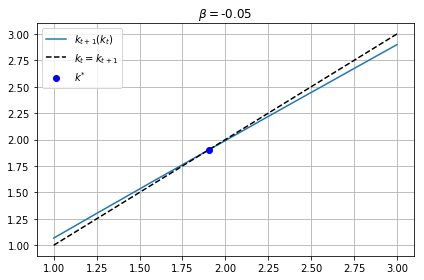

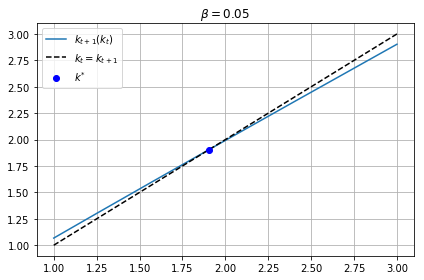

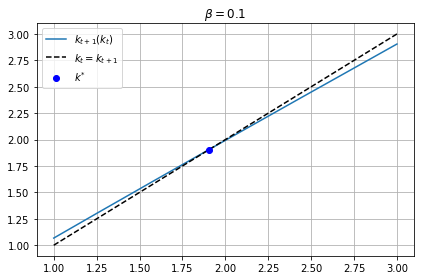

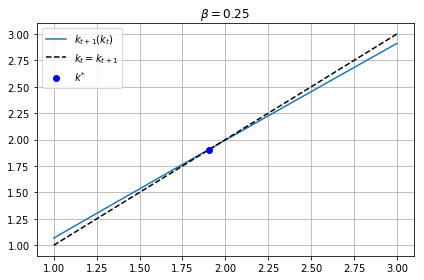

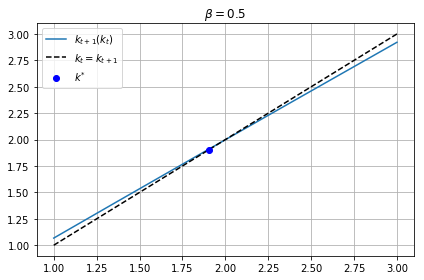

In [29]:

for beta in betas:
    ks = np.linspace(1,3,10000)
    ks1 = [trans_eq(k) for k in ks]

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)

    ax.plot(ks,ks1,label='$k_{t+1}(k_{t})$')
    ax.plot(ks,ks,ls='--',color='black',label='$k_{t}=k_{t+1}$')
    ax.plot(kstar,transitioneq(kstar),ls='',marker='o',color='blue',label='$k^{*}$')

    ax.grid(True)
    plt.title(r'$\beta=$'+f'{beta}')
    plt.legend(loc="upper left")
    fig.tight_layout()

In [30]:
for beta in betas:
    f = lambda k: (alpha*k**beta + (1-alpha))**(1/beta)
    obj_kss = lambda kss: kss - (s*f(kss) + (1-delta)*kss)/((1+g)*(1+n))
    result = optimize.root_scalar(obj_kss,bracket=[0.1,100],method='brentq')
    print(f'for beta = {beta:.3f} the steady state for k is',result.root)    

for beta = -0.500 the steady state for k is 1.8471297000972984
for beta = -0.250 the steady state for k is 1.873383262758588
for beta = -0.100 the steady state for k is 1.8910856397655083
for beta = -0.050 the steady state for k is 1.8973581025712736
for beta = 0.050 the steady state for k is 1.9105159729244352
for beta = 0.100 the steady state for k is 1.917422132817728
for beta = 0.250 the steady state for k is 1.9395902733676993
for beta = 0.500 the steady state for k is 1.9822334997701418
